### Performance tests
In this notebook we test the performance of the CURE, DBSCAN, hierarchical and k-means clustering models. Each will be test using 1000, 10,000 and 100,000 data points.

In [1]:
\c 20 100
\l ml/ml.q
.ml.loadfile`:clust/init.q
plt:.p.import`matplotlib.pyplot

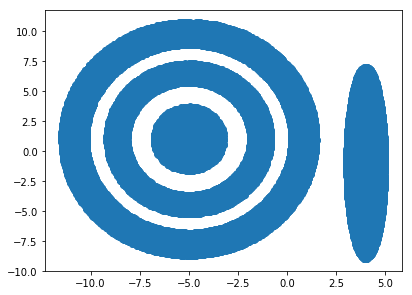

In [2]:
dsc:{[n;r;s](r+n?s-r)*/:(cos;sin)@\:4*n?acos 0}
d :flip(-5 1)+(1 1.5)*dsc[10000;0;1.8],'dsc[20000;3.1;4.2],'dsc[40000;5.2;6.5]
d,:flip(4 -1)+(1 8)*dsc[40000;0;1.]
plt[`:scatter][;]. flip d;
plt[`:show][];

In [3]:
/take samples of d with 100, 1000 and 10,000 data points
sample:{x neg[y&count x]?count x}
d1h: sample[d;100]
d1k: sample[d;1000]
d10k:sample[d;10000]

In [4]:
/input dictionary
show id:`cure`dbscan`hc`kmeans!(` sv'`.ml.clust,'`cure`dbscan`hc`kmeans),'
        (enlist each((4;`e2dist;30;0;01b;0b);(`e2dist;2;1.2);(4;`e2dist;key .ml.clust.i.ld);(4;50;01b;`e2dist))),'
         enlist each(1 4;(),0;2 1;(),3)

cure  | `.ml.clust.cure   (4;`e2dist;30;0;01b;0b)                            1 4
dbscan| `.ml.clust.dbscan (`e2dist;2;1.2)                                    ,0 
hc    | `.ml.clust.hc     (4;`e2dist;`single`complete`average`centroid`ward) 2 1
kmeans| `.ml.clust.kmeans (4;50;01b;`e2dist)                                 ,3 


In [5]:
/performance - returns time and space for a function
/* d = data
/* a = algo
perform:{[d;a]
 r:p[id[a;0];d]each i:(cross/)id[a;1];
 m:{`$string[x],"_","_"sv string each y id[x;2]}[a]each i;
 flip(`method,`$("time_";"space_"),\:string count d)!enlist[m],flip r}
p:{.Q.ts[get[x]y;z]}

In [6]:
/run for each sample and algo
t1:raze perform[d1h]each key id
t2:raze perform[d1k]each key id
t3:raze perform[d10k]each key id

In [7]:
/join results
(^/)(t1;t2;t3)

method             time_100 space_100 time_1000 space_1000 time_10000 space_10000
---------------------------------------------------------------------------------
cure_e2dist_0      126      39584     3157      314384     113500     3752688    
cure_e2dist_1      3        37136     47        273920     1175       3255600    
dbscan_e2dist      0        17472     29        3715568    11012      1650730448 
hc_single_e2dist   88       49952     1317      290768     154209     3359632    
hc_complete_e2dist 19       172896    2664      14657808   608799     1461862464 
hc_average_e2dist  18       142688    2686      17003104   661973     1650830864 
hc_centroid_e2dist 21       47040     244       298176     9523       3506464    
hc_ward_e2dist     11       27600     1050      207408     105384     2989536    
kmeans_e2dist      2        22016     27        194560     280        2329600    
kmeans_e2dist      2        22016     27        194560     286        2329600    


---